# Team Project 1 - MATH 420
## James Boggs and Camilo Velez R
### NYC Covid Data

In [3]:
# activate env and instantiate pkgs
using Pkg
Pkg.activate("../p1")
Pkg.instantiate()

  Activating project at `~/m420p1/p1`


In [4]:
using CSV, DataFrames, Dates # import necessary pkgs

In [5]:
df = CSV.read("../resources/data.csv", DataFrame) # entire df

v_infected = values(df[1, 13:end]) # vector of infected numbers
infected_dates = names(df[1, 13:end]) # vector of infected_dates
@assert length(v_infected) == length(infected_dates)

In [6]:
findfirst([x>=5 for x in v_infected])

46

## 1)

$T_{0} = 46$

In [7]:
#TODO Camilo answer q 1 a)

## 2)

In [30]:
vt = values(df[1, 13+46:13+46+120-1]);
@show length(vt)

length(vt) = 120


120

In [13]:
first(vt, 4)

4-element Vector{Int64}:
  5
  5
 12
 24

In [31]:
I(t:: Int) = vt[t+1] # define I(t)

I (generic function with 2 methods)

In [32]:
I(0)

5

In [47]:
Nmax = df.Population[1];
Nmin = vt[end] + 1;
@show Nmax, Nmin

(Nmax, Nmin) = (1628706, 27717)


(1628706, 27717)

In [48]:
f1(t::Int, n::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))

f1 (generic function with 2 methods)

In [63]:
tmax = 119;
β̂_min = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmin), 1:tmax))

0.13807405982926169

In [56]:
β̂_max = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmax), 1:tmax))

0.10515569276026039

Values for estimated $\beta$:
* For $N_{max}: \hat{\beta} \approx 0.105$
* For $N_{min}: \hat{\beta} \approx 0.138$

In [65]:
beta = Dict(Nmin=> β̂_min, Nmax => β̂_max)

Dict{Int64, Float64} with 2 entries:
  27717   => 0.138074
  1628706 => 0.105156

In [87]:
j_helper(t, n) = (beta[n]*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
J(n::Int) = sum(x -> j_helper(x, n), 0:tmax)

J (generic function with 1 method)

In [88]:
for x in 1:tmax
    try
        j_helper(x, Nmin)
    catch DomainError
        @show x
    end
end

In [89]:
J(Nmin)

874.1086923318926

In [90]:
J(Nmax)

1078.5175521773804

$J(\beta, N)$:
* For $N_{max}: J(\beta, N) \approx 874.109$:
* For $N_{min}: J(\beta, N) \approx 1078.517$:

In [57]:
using Plots

In [66]:
function predict1(n::Int, t::Int)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta[n]*t))
end

predict1 (generic function with 1 method)

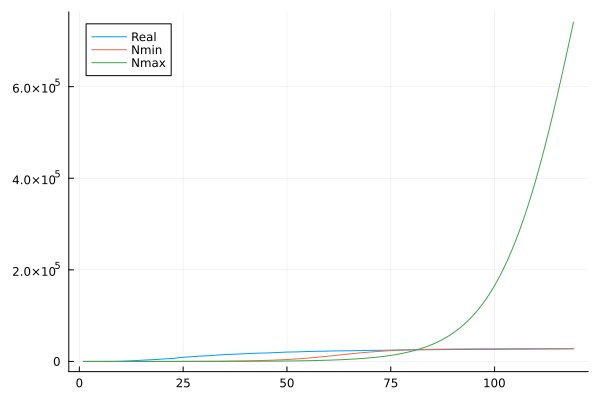

In [75]:
plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax], [predict1(Nmax, x) for x in 1:tmax]],
label = ["Real" "Nmin" "Nmax"])

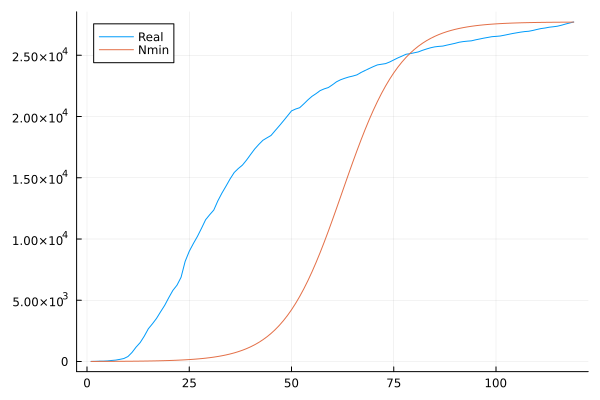

In [77]:

plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax]], 
label = ["Real" "Nmin"])

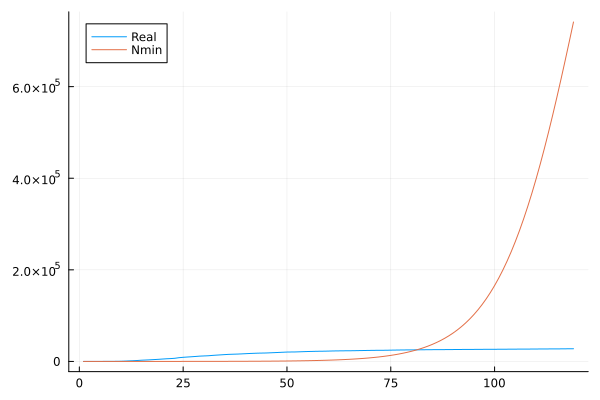

In [79]:
plot(1:tmax, [I.(1:tmax), [predict1(Nmax, x) for x in 1:tmax]],
label = ["Real" "Nmin" "Nmax"])

In [ ]:
function J2(n::Int)::Real
    s1(t::Int) = abs(log(I(t)*(n - I(0)))/(I(0)*(N - I(t))))^2
    s2(t::Int) = t*log((I(t)*(N - I(0))) / (I(0)*(N - I(t))))
    